# Диплом

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

/Users/ilabarymov/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/ilabarymov/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Загрузка файла

In [2]:
df = pd.read_csv('Global_Superstore2.csv', encoding='unicode_escape')

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium


# Начальная предобработка
## Базовый анализ

In [4]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [5]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [6]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [7]:
len(df['Product Name'].unique())

3788

In [8]:
df.sort_values(by='Order ID')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
34136,48312,AE-2011-9160,03-10-2011,07-10-2011,Standard Class,PO-8865,Patrick O'Donnell,Consumer,Ajman,'Ajman,...,TEC-EPS-10004171,Technology,Machines,"Epson Calculator, Red",78.408,6,0.7,-88.992,3.87,Medium
29578,48313,AE-2011-9160,03-10-2011,07-10-2011,Standard Class,PO-8865,Patrick O'Donnell,Consumer,Ajman,'Ajman,...,OFF-FEL-10001405,Office Supplies,Storage,"Fellowes File Cart, Industrial",82.674,2,0.7,-157.086,5.69,Medium
5597,47298,AE-2013-1130,14-10-2013,14-10-2013,Same Day,EB-4110,Eugene Barchas,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,FUR-BUS-10003055,Furniture,Bookcases,"Bush Stackable Bookrack, Pine",224.748,6,0.7,-232.272,60.08,High
51156,47297,AE-2013-1130,14-10-2013,14-10-2013,Same Day,EB-4110,Eugene Barchas,Consumer,Ras al Khaymah,Ra's Al Khaymah,...,OFF-ACC-10004278,Office Supplies,Fasteners,"Accos Paper Clips, Bulk Pack",4.248,1,0.7,-4.692,0.10,High
42362,48617,AE-2013-1530,31-12-2013,03-01-2014,Second Class,MY-7380,Maribeth Yedwab,Corporate,Ras al Khaymah,Ra's Al Khaymah,...,OFF-TEN-10002817,Office Supplies,Storage,"Tenex Folders, Blue",6.966,1,0.7,-8.604,1.75,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39989,42069,ZI-2014-7610,24-03-2014,28-03-2014,Standard Class,BS-1380,Bill Stewart,Corporate,Bulawayo,Bulawayo,...,TEC-STA-10000699,Technology,Machines,"StarTech Phone, Red",21.501,1,0.7,-20.799,2.25,Medium
50110,48836,ZI-2014-9540,09-06-2014,15-06-2014,Standard Class,BT-1395,Bill Tyler,Corporate,Harare,Harare,...,OFF-BIN-10001274,Office Supplies,Art,"Binney & Smith Pens, Blue",7.164,2,0.7,-6.696,0.35,Medium
51212,48373,ZI-2014-9550,18-12-2014,23-12-2014,Standard Class,JC-5775,John Castell,Consumer,Bulawayo,Bulawayo,...,OFF-AVE-10000543,Office Supplies,Binders,"Avery Hole Reinforcements, Clear",1.161,1,0.7,-2.349,0.07,Medium
33613,48372,ZI-2014-9550,18-12-2014,23-12-2014,Standard Class,JC-5775,John Castell,Consumer,Bulawayo,Bulawayo,...,TEC-KON-10003116,Technology,Machines,"Konica Receipt Printer, Red",71.640,2,0.7,-93.180,4.05,Medium


Можем видеть, что в одном заказе могут лежать разные товары, из-за чего возникают дубли в столбце Order ID. Уберем заведомо ненужные колонки: Row ID, Customer ID, Customer Name, Postal Code, Order ID, Product Name.

In [9]:
df.drop(['Order ID', 'Row ID', 'Customer ID', 'Customer Name', 'Postal Code', 'Product Name', 'Product ID'], axis=1, inplace=True)

In [10]:
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,31-07-2012,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,05-02-2013,07-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,17-10-2013,18-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,28-01-2013,30-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,05-11-2013,06-11-2013,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,19-06-2014,19-06-2014,Same Day,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.01,Medium
51286,20-06-2014,24-06-2014,Standard Class,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,0.01,Medium
51287,02-12-2013,02-12-2013,Same Day,Home Office,Oxnard,California,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.01,High
51288,18-02-2012,22-02-2012,Standard Class,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,0.00,Medium


In [11]:
df['Price'] = df['Sales'] / df['Quantity']
df

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price
0,31-07-2012,31-07-2012,Same Day,Consumer,New York City,New York,United States,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical,329.950
1,05-02-2013,07-02-2013,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical,412.155
2,17-10-2013,18-10-2013,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium,575.019
3,28-01-2013,30-01-2013,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium,578.502
4,05-11-2013,06-11-2013,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical,354.120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,19-06-2014,19-06-2014,Same Day,Corporate,Kure,Hiroshima,Japan,APAC,North Asia,Office Supplies,Fasteners,65.100,5,0.0,4.5000,0.01,Medium,13.020
51286,20-06-2014,24-06-2014,Standard Class,Consumer,Houston,Texas,United States,US,Central,Office Supplies,Appliances,0.444,1,0.8,-1.1100,0.01,Medium,0.444
51287,02-12-2013,02-12-2013,Same Day,Home Office,Oxnard,California,United States,US,West,Office Supplies,Envelopes,22.920,3,0.0,11.2308,0.01,High,7.640
51288,18-02-2012,22-02-2012,Standard Class,Home Office,Valinhos,São Paulo,Brazil,LATAM,South,Office Supplies,Binders,13.440,2,0.0,2.4000,0.00,Medium,6.720


## Преобразование форматов

Преобразуем форматы столбцов с датами.

In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.sort_values(by='Order Date')

/var/folders/pf/dxhtqvm567j60pyv1yzqr_sc0000gn/T/ipykernel_63267/627122228.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/var/folders/pf/dxhtqvm567j60pyv1yzqr_sc0000gn/T/ipykernel_63267/627122228.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price
25084,2011-01-01,2011-01-05,Second Class,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,Office Supplies,Storage,66.1200,4,0.00,29.6400,8.17,High,16.5300
22951,2011-01-01,2011-01-08,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Supplies,120.3660,3,0.10,36.0360,9.72,Medium,40.1220
9352,2011-01-01,2011-01-06,Standard Class,Consumer,Constantine,Constantine,Algeria,Africa,Africa,Office Supplies,Storage,408.3000,2,0.00,106.1400,35.46,Medium,204.1500
42055,2011-01-01,2011-01-08,Standard Class,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,Office Supplies,Paper,55.2420,2,0.10,15.3420,1.80,Medium,27.6210
31579,2011-01-01,2011-01-05,Second Class,Home Office,Stockholm,Stockholm,Sweden,EU,North,Office Supplies,Paper,44.8650,3,0.50,-26.0550,4.82,High,14.9550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50052,2014-12-31,2015-01-02,Second Class,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Labels,26.4000,3,0.00,12.3600,0.35,Medium,8.8000
3590,2014-12-31,2015-01-03,First Class,Corporate,Bangkok,Bangkok,Thailand,APAC,Southeast Asia,Furniture,Tables,1048.7313,9,0.57,-1195.2387,86.86,High,116.5257
28699,2014-12-31,2015-01-03,First Class,Consumer,Dar es Salaam,Dar Es Salaam,Tanzania,Africa,Africa,Office Supplies,Storage,22.9230,1,0.10,4.0530,6.11,High,22.9230
29674,2014-12-31,2015-01-02,Second Class,Consumer,Managua,Managua,Nicaragua,LATAM,Central,Office Supplies,Supplies,72.3200,8,0.00,6.4000,5.64,Medium,9.0400


In [13]:
df.nunique()

Order Date         1430
Ship Date          1464
Ship Mode             4
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Category              3
Sub-Category         17
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
Price             14738
dtype: int64

Выпишем названия колонок, разобьем признаки на категориальные и числовые.

In [14]:
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City', 'State',
       'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Price'],
      dtype='object')

In [15]:
categorical = ['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']
numerical = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

## Распределение числовых признаков

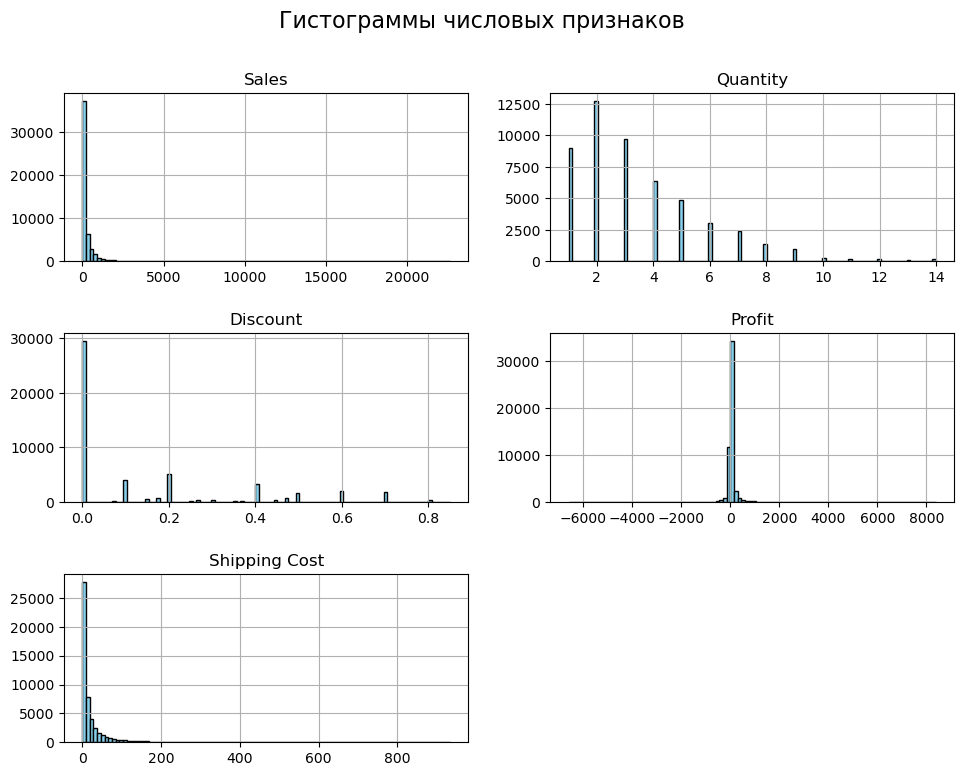

In [16]:
df[numerical].hist(figsize=(10, 8), bins=100, color='skyblue', edgecolor='black')

plt.suptitle('Гистограммы числовых признаков', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

In [17]:
df = df[df['Sales'] <= 3000]
df = df[df['Shipping Cost'] <= 400]
df = df[df['Profit'] >= -1000]
df = df[df['Profit'] <= 1000]
len(df)

50810

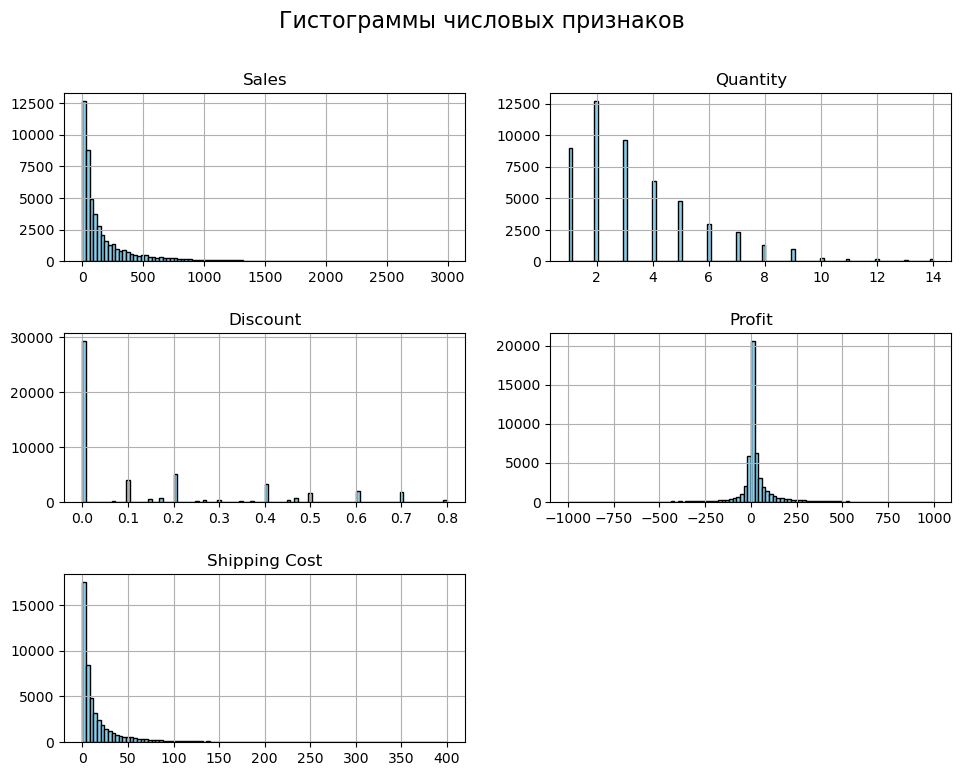

In [18]:
df[numerical].hist(figsize=(10, 8), bins=100, color='skyblue', edgecolor='black')

plt.suptitle('Гистограммы числовых признаков', fontsize=16)
plt.tight_layout(pad=2.0)
plt.show()

После анализа гистограмм было принято решение обрезать данные как с правых концов, так и с левых. В итоге из исходных 51290 было оставлено 50810 строк, то есть было убрано 480 строк, что не должно значительно сказаться на качестве модели.

Построим heatmap для числовых признаков чтобы проверить наличие линейной зависимости между признаками.

## Матрица корреляций

In [19]:
correlation_matrix = df[numerical].corr()
correlation_matrix

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.316028,-0.107723,0.464819,0.820036
Quantity,0.316028,1.000000,-0.021403,0.118178,0.263705
Discount,-0.107723,-0.021403,1.000000,-0.402936,-0.092328
Profit,0.464819,0.118178,-0.402936,1.000000,0.379541
Shipping Cost,0.820036,0.263705,-0.092328,0.379541,1.000000


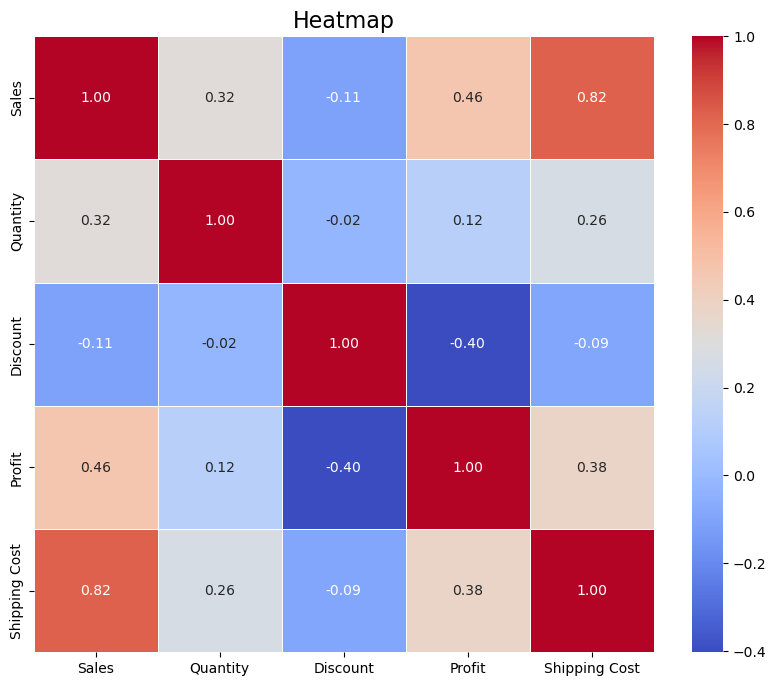

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap', fontsize=16)
plt.show()

# Энкодинг

Выведем еще раз разбиение фичей на категориальные и числовые. Также выведем количества уникальных значений.

In [21]:
categorical

['Ship Mode',
 'Segment',
 'City',
 'State',
 'Country',
 'Market',
 'Region',
 'Category',
 'Sub-Category',
 'Order Priority']

In [22]:
numerical

['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost']

In [23]:
df[categorical].nunique()

Ship Mode            4
Segment              3
City              3631
State             1093
Country            147
Market               7
Region              13
Category             3
Sub-Category        17
Order Priority       4
dtype: int64

Уникальных значений в поле City слишком много для кодировки, поэтому его тоже следует убрать.

In [24]:
categorical = ['Ship Mode', 'Segment', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category', 'Order Priority']
df.drop(['City'], axis=1, inplace=True)

Выберем вариант кодировки для каждой категориальной фичи.

In [25]:
df['Ship Mode'].unique() # Label Encoding

array(['First Class', 'Same Day', 'Standard Class', 'Second Class'],
      dtype=object)

In [26]:
df['Segment'].unique() # OneHot Encoding

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [27]:
df['State'].unique() # OneHot Encoding

array(['Al Qahirah', 'Michigan', 'Washington', ..., 'Manicaland',
       'Kabarole', 'Matabeleland North'], dtype=object)

In [28]:
df['Country'].unique() # OneHot Encoding

array(['Egypt', 'United States', 'Azerbaijan', 'Indonesia', 'France',
       'Argentina', 'India', 'Lesotho', 'China', 'Brazil', 'Nicaragua',
       'Austria', 'Mexico', 'Australia', 'United Kingdom', 'Spain',
       'Vietnam', 'Cuba', 'Romania', 'New Zealand', 'Cameroon', 'Russia',
       'South Africa', 'Guatemala', 'Germany', 'Hungary', 'Italy',
       'Philippines', 'Singapore', 'Angola', 'Japan', 'El Salvador',
       'Malaysia', 'Belgium', 'Finland', 'Colombia', 'Ghana', 'Thailand',
       'Iran', 'Ukraine', 'Mozambique', 'Zambia', 'Liberia', 'Georgia',
       'Poland', 'Switzerland', 'Albania', 'Bangladesh', 'Chad',
       'Pakistan', 'Namibia', 'Netherlands', 'Dominican Republic',
       'Madagascar', 'Morocco', 'Saudi Arabia', 'Canada', 'Sweden',
       'Myanmar (Burma)', 'Jamaica', 'Qatar',
       'Democratic Republic of the Congo', 'Tanzania',
       'Republic of the Congo', 'Norway', 'Iraq', 'Algeria', 'Turkey',
       'South Korea', 'Estonia', "Cote d'Ivoire", 'Honduras', 

In [29]:
df['Market'].unique() # OneHot Encoding

array(['Africa', 'US', 'EMEA', 'APAC', 'EU', 'LATAM', 'Canada'],
      dtype=object)

In [30]:
df['Region'].unique() # OneHot Encoding

array(['Africa', 'Central', 'West', 'East', 'EMEA', 'Southeast Asia',
       'South', 'Central Asia', 'North Asia', 'North', 'Oceania',
       'Caribbean', 'Canada'], dtype=object)

In [31]:
df['Category'].unique() # OneHot Encoding

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

In [32]:
df['Sub-Category'].unique() # OneHot Encoding

array(['Phones', 'Chairs', 'Machines', 'Tables', 'Bookcases', 'Copiers',
       'Appliances', 'Accessories', 'Binders', 'Storage', 'Supplies',
       'Furnishings', 'Art', 'Paper', 'Envelopes', 'Fasteners', 'Labels'],
      dtype=object)

In [33]:
df['Order Priority'].unique() # Label Encoding

array(['Critical', 'High', 'Medium', 'Low'], dtype=object)

In [34]:
ohe_features = ['Segment', 'State', 'Country', 'Market', 'Region', 'Category', 'Sub-Category']
label_features = ['Ship Mode', 'Order Priority']

## OneHot Encoding

In [35]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_columns = encoder.fit_transform(df[ohe_features])
encoded_col_names = encoder.get_feature_names_out(ohe_features)
df_ohe_encoded = pd.DataFrame(encoded_columns, columns=encoded_col_names, index=df.index)
df_encoded = df.drop(columns=ohe_features).join(df_ohe_encoded)

df_encoded

,Order Date,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
234,2012-03-30,2012-04-01,First Class,1274.700,2,0.0,140.1600,399.96,Critical,637.350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
238,2014-12-23,2014-12-26,First Class,1586.690,7,0.0,412.5394,397.52,High,226.670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,2014-07-04,2014-07-04,Same Day,2395.200,6,0.2,209.5800,396.92,High,399.200,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
240,2014-11-21,2014-11-23,First Class,1259.970,3,0.0,327.5922,394.57,Critical,419.990,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
241,2013-01-23,2013-01-27,Standard Class,2058.000,4,0.0,946.6800,393.62,High,514.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,Same Day,65.100,5,0.0,4.5000,0.01,Medium,13.020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51286,2014-06-20,2014-06-24,Standard Class,0.444,1,0.8,-1.1100,0.01,Medium,0.444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51287,2013-12-02,2013-12-02,Same Day,22.920,3,0.0,11.2308,0.01,High,7.640,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51288,2012-02-18,2012-02-22,Standard Class,13.440,2,0.0,2.4000,0.00,Medium,6.720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Label Encoding

In [36]:
label_encoders = {}
for col in label_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded

,Order Date,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
234,2012-03-30,2012-04-01,0,1274.700,2,0.0,140.1600,399.96,0,637.350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
238,2014-12-23,2014-12-26,0,1586.690,7,0.0,412.5394,397.52,1,226.670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,2014-07-04,2014-07-04,1,2395.200,6,0.2,209.5800,396.92,1,399.200,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
240,2014-11-21,2014-11-23,0,1259.970,3,0.0,327.5922,394.57,0,419.990,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
241,2013-01-23,2013-01-27,3,2058.000,4,0.0,946.6800,393.62,1,514.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,1,65.100,5,0.0,4.5000,0.01,3,13.020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51286,2014-06-20,2014-06-24,3,0.444,1,0.8,-1.1100,0.01,3,0.444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51287,2013-12-02,2013-12-02,1,22.920,3,0.0,11.2308,0.01,1,7.640,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51288,2012-02-18,2012-02-22,3,13.440,2,0.0,2.4000,0.00,3,6.720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Standart Scaler

In [37]:
df_encoded_scaled = df_encoded.copy()

scaler = StandardScaler()

df_encoded_scaled[numerical] = scaler.fit_transform(df_encoded_scaled[numerical])

df_encoded_scaled

,Order Date,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,...,Sub-Category_Envelopes,Sub-Category_Fasteners,Sub-Category_Furnishings,Sub-Category_Labels,Sub-Category_Machines,Sub-Category_Paper,Sub-Category_Phones,Sub-Category_Storage,Sub-Category_Supplies,Sub-Category_Tables
234,2012-03-30,2012-04-01,0,2.990438,-0.642117,-0.673429,1.006289,8.953183,0,637.350,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
238,2014-12-23,2014-12-26,0,3.874441,1.581116,-0.673429,3.384700,8.895208,1,226.670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239,2014-07-04,2014-07-04,1,6.165302,1.136470,0.269444,1.612463,8.880952,1,399.200,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
240,2014-11-21,2014-11-23,0,2.948701,-0.197470,-0.673429,2.642943,8.825115,0,419.990,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
241,2013-01-23,2013-01-27,3,5.209868,0.247177,-0.673429,8.048805,8.802543,1,514.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,1,-0.436886,0.691823,-0.673429,-0.178292,-0.549711,3,13.020,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51286,2014-06-20,2014-06-24,3,-0.620085,-1.086763,3.098064,-0.227278,-0.549711,3,0.444,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51287,2013-12-02,2013-12-02,1,-0.556400,-0.197470,-0.673429,-0.119519,-0.549711,1,7.640,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51288,2012-02-18,2012-02-22,3,-0.583261,-0.642117,-0.673429,-0.196629,-0.549948,3,6.720,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Datetime encoding

Order date

In [38]:
df_encoded_scaled['order_year'] = df_encoded_scaled['Order Date'].dt.year
df_encoded_scaled['order_month'] = df_encoded_scaled['Order Date'].dt.month
df_encoded_scaled['order_day'] = df_encoded_scaled['Order Date'].dt.day
df_encoded_scaled['order_dayofweek'] = df_encoded_scaled['Order Date'].dt.dayofweek
df_encoded_scaled['order_quarter'] = df_encoded_scaled['Order Date'].dt.quarter
df_encoded_scaled['order_dayofyear'] = df_encoded_scaled['Order Date'].dt.dayofyear
df_encoded_scaled['order_weekofyear'] = df_encoded_scaled['Order Date'].dt.isocalendar().week
df_encoded_scaled['order_hour'] = df_encoded_scaled['Order Date'].dt.hour
df_encoded_scaled['order_minute'] = df_encoded_scaled['Order Date'].dt.minute
df_encoded_scaled['order_second'] = df_encoded_scaled['Order Date'].dt.second

df_encoded_scaled

,Order Date,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,...,order_year,order_month,order_day,order_dayofweek,order_quarter,order_dayofyear,order_weekofyear,order_hour,order_minute,order_second
234,2012-03-30,2012-04-01,0,2.990438,-0.642117,-0.673429,1.006289,8.953183,0,637.350,...,2012,3,30,4,1,90,13,0,0,0
238,2014-12-23,2014-12-26,0,3.874441,1.581116,-0.673429,3.384700,8.895208,1,226.670,...,2014,12,23,1,4,357,52,0,0,0
239,2014-07-04,2014-07-04,1,6.165302,1.136470,0.269444,1.612463,8.880952,1,399.200,...,2014,7,4,4,3,185,27,0,0,0
240,2014-11-21,2014-11-23,0,2.948701,-0.197470,-0.673429,2.642943,8.825115,0,419.990,...,2014,11,21,4,4,325,47,0,0,0
241,2013-01-23,2013-01-27,3,5.209868,0.247177,-0.673429,8.048805,8.802543,1,514.500,...,2013,1,23,2,1,23,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,2014-06-19,1,-0.436886,0.691823,-0.673429,-0.178292,-0.549711,3,13.020,...,2014,6,19,3,2,170,25,0,0,0
51286,2014-06-20,2014-06-24,3,-0.620085,-1.086763,3.098064,-0.227278,-0.549711,3,0.444,...,2014,6,20,4,2,171,25,0,0,0
51287,2013-12-02,2013-12-02,1,-0.556400,-0.197470,-0.673429,-0.119519,-0.549711,1,7.640,...,2013,12,2,0,4,336,49,0,0,0
51288,2012-02-18,2012-02-22,3,-0.583261,-0.642117,-0.673429,-0.196629,-0.549948,3,6.720,...,2012,2,18,5,1,49,7,0,0,0


In [39]:
df_encoded_scaled['order_year'] = df_encoded_scaled['Order Date'].dt.year
df_encoded_scaled['order_month'] = df_encoded_scaled['Order Date'].dt.month
df_encoded_scaled['order_day'] = df_encoded_scaled['Order Date'].dt.day
df_encoded_scaled['order_dayofweek'] = df_encoded_scaled['Order Date'].dt.dayofweek
df_encoded_scaled['order_quarter'] = df_encoded_scaled['Order Date'].dt.quarter
df_encoded_scaled['order_dayofyear'] = df_encoded_scaled['Order Date'].dt.dayofyear
df_encoded_scaled['order_weekofyear'] = df_encoded_scaled['Order Date'].dt.isocalendar().week
df_encoded_scaled['order_hour'] = df_encoded_scaled['Order Date'].dt.hour
df_encoded_scaled['order_minute'] = df_encoded_scaled['Order Date'].dt.minute
df_encoded_scaled['order_second'] = df_encoded_scaled['Order Date'].dt.second

df_encoded_scaled.drop(['Order Date'], axis=1, inplace=True)
df_encoded_scaled

,Ship Date,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,Segment_Corporate,...,order_year,order_month,order_day,order_dayofweek,order_quarter,order_dayofyear,order_weekofyear,order_hour,order_minute,order_second
234,2012-04-01,0,2.990438,-0.642117,-0.673429,1.006289,8.953183,0,637.350,0.0,...,2012,3,30,4,1,90,13,0,0,0
238,2014-12-26,0,3.874441,1.581116,-0.673429,3.384700,8.895208,1,226.670,0.0,...,2014,12,23,1,4,357,52,0,0,0
239,2014-07-04,1,6.165302,1.136470,0.269444,1.612463,8.880952,1,399.200,0.0,...,2014,7,4,4,3,185,27,0,0,0
240,2014-11-23,0,2.948701,-0.197470,-0.673429,2.642943,8.825115,0,419.990,0.0,...,2014,11,21,4,4,325,47,0,0,0
241,2013-01-27,3,5.209868,0.247177,-0.673429,8.048805,8.802543,1,514.500,0.0,...,2013,1,23,2,1,23,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,2014-06-19,1,-0.436886,0.691823,-0.673429,-0.178292,-0.549711,3,13.020,1.0,...,2014,6,19,3,2,170,25,0,0,0
51286,2014-06-24,3,-0.620085,-1.086763,3.098064,-0.227278,-0.549711,3,0.444,0.0,...,2014,6,20,4,2,171,25,0,0,0
51287,2013-12-02,1,-0.556400,-0.197470,-0.673429,-0.119519,-0.549711,1,7.640,0.0,...,2013,12,2,0,4,336,49,0,0,0
51288,2012-02-22,3,-0.583261,-0.642117,-0.673429,-0.196629,-0.549948,3,6.720,0.0,...,2012,2,18,5,1,49,7,0,0,0


In [40]:
df_encoded_scaled['ship_year'] = df_encoded_scaled['Ship Date'].dt.year
df_encoded_scaled['ship_month'] = df_encoded_scaled['Ship Date'].dt.month
df_encoded_scaled['ship_day'] = df_encoded_scaled['Ship Date'].dt.day
df_encoded_scaled['ship_dayofweek'] = df_encoded_scaled['Ship Date'].dt.dayofweek
df_encoded_scaled['ship_quarter'] = df_encoded_scaled['Ship Date'].dt.quarter
df_encoded_scaled['ship_dayofyear'] = df_encoded_scaled['Ship Date'].dt.dayofyear
df_encoded_scaled['ship_weekofyear'] = df_encoded_scaled['Ship Date'].dt.isocalendar().week
df_encoded_scaled['ship_hour'] = df_encoded_scaled['Ship Date'].dt.hour
df_encoded_scaled['ship_minute'] = df_encoded_scaled['Ship Date'].dt.minute
df_encoded_scaled['ship_second'] = df_encoded_scaled['Ship Date'].dt.second

df_encoded_scaled.drop(['Ship Date'], axis=1, inplace=True)
df_encoded_scaled

,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,Segment_Corporate,Segment_Home Office,...,ship_year,ship_month,ship_day,ship_dayofweek,ship_quarter,ship_dayofyear,ship_weekofyear,ship_hour,ship_minute,ship_second
234,0,2.990438,-0.642117,-0.673429,1.006289,8.953183,0,637.350,0.0,0.0,...,2012,4,1,6,2,92,13,0,0,0
238,0,3.874441,1.581116,-0.673429,3.384700,8.895208,1,226.670,0.0,0.0,...,2014,12,26,4,4,360,52,0,0,0
239,1,6.165302,1.136470,0.269444,1.612463,8.880952,1,399.200,0.0,1.0,...,2014,7,4,4,3,185,27,0,0,0
240,0,2.948701,-0.197470,-0.673429,2.642943,8.825115,0,419.990,0.0,0.0,...,2014,11,23,6,4,327,47,0,0,0
241,3,5.209868,0.247177,-0.673429,8.048805,8.802543,1,514.500,0.0,0.0,...,2013,1,27,6,1,27,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,1,-0.436886,0.691823,-0.673429,-0.178292,-0.549711,3,13.020,1.0,0.0,...,2014,6,19,3,2,170,25,0,0,0
51286,3,-0.620085,-1.086763,3.098064,-0.227278,-0.549711,3,0.444,0.0,0.0,...,2014,6,24,1,2,175,26,0,0,0
51287,1,-0.556400,-0.197470,-0.673429,-0.119519,-0.549711,1,7.640,0.0,1.0,...,2013,12,2,0,4,336,49,0,0,0
51288,3,-0.583261,-0.642117,-0.673429,-0.196629,-0.549948,3,6.720,0.0,1.0,...,2012,2,22,2,1,53,8,0,0,0


In [41]:
df_encoded_scaled # Финальный датафрейм

,Ship Mode,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Price,Segment_Corporate,Segment_Home Office,...,ship_year,ship_month,ship_day,ship_dayofweek,ship_quarter,ship_dayofyear,ship_weekofyear,ship_hour,ship_minute,ship_second
234,0,2.990438,-0.642117,-0.673429,1.006289,8.953183,0,637.350,0.0,0.0,...,2012,4,1,6,2,92,13,0,0,0
238,0,3.874441,1.581116,-0.673429,3.384700,8.895208,1,226.670,0.0,0.0,...,2014,12,26,4,4,360,52,0,0,0
239,1,6.165302,1.136470,0.269444,1.612463,8.880952,1,399.200,0.0,1.0,...,2014,7,4,4,3,185,27,0,0,0
240,0,2.948701,-0.197470,-0.673429,2.642943,8.825115,0,419.990,0.0,0.0,...,2014,11,23,6,4,327,47,0,0,0
241,3,5.209868,0.247177,-0.673429,8.048805,8.802543,1,514.500,0.0,0.0,...,2013,1,27,6,1,27,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,1,-0.436886,0.691823,-0.673429,-0.178292,-0.549711,3,13.020,1.0,0.0,...,2014,6,19,3,2,170,25,0,0,0
51286,3,-0.620085,-1.086763,3.098064,-0.227278,-0.549711,3,0.444,0.0,0.0,...,2014,6,24,1,2,175,26,0,0,0
51287,1,-0.556400,-0.197470,-0.673429,-0.119519,-0.549711,1,7.640,0.0,1.0,...,2013,12,2,0,4,336,49,0,0,0
51288,3,-0.583261,-0.642117,-0.673429,-0.196629,-0.549948,3,6.720,0.0,1.0,...,2012,2,22,2,1,53,8,0,0,0
